In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] =10, 6

In [2]:
df= pd.read_csv('C:/Users/simhaj-local/Documents/GitHub/NordPole_Price/Hourly/CSVFiles/06.elspot-prices_2018_hourly.csv')
#Parse strings to datetime type
#dataset['Hours'] = pd.to_datetime(dataset['Hours'], infer_datetime_format=True)
#indexedDataset = dataset.set_index(['Hours'])

In [3]:
from datetime import datetime, timedelta
#indexedDataset.head()
datetime

datetime.datetime

In [4]:
df['DateAndTime'] = pd.date_range('1/1/2018', periods=8761, freq='H')

In [11]:
##plot graph
#plt.xlabel('Hours')
#plt.ylabel('SE1 price')
#df['SE1'].plot(linewidth=1.5, marker = '.', linestyle = '--')


In [12]:
start = datetime(2018,1,1)
end = datetime(2018,12,31)
daterange = [start + timedelta(days=x) for x in range(0, (end-start).days)]
data = pd.DataFrame({'date':daterange, 'v':np.random.randint(0,100,size=len(daterange))}).set_index('date')

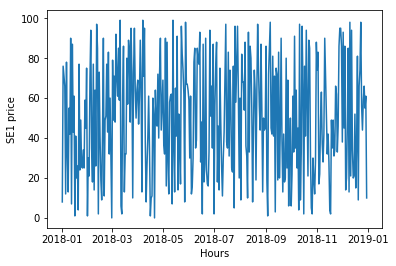

In [13]:
##plot graph
plt.xlabel('Hours')
plt.ylabel('SE1 price')
plt.plot(data)

In [14]:
#determining rolling statistics
rolmean = data.rolling(window=365).mean()

rolstd = data.rolling(window=365).std()
print(rolmean,rolstd)

             v
date          
2018-01-01 NaN
2018-01-02 NaN
2018-01-03 NaN
2018-01-04 NaN
2018-01-05 NaN
2018-01-06 NaN
2018-01-07 NaN
2018-01-08 NaN
2018-01-09 NaN
2018-01-10 NaN
2018-01-11 NaN
2018-01-12 NaN
2018-01-13 NaN
2018-01-14 NaN
2018-01-15 NaN
2018-01-16 NaN
2018-01-17 NaN
2018-01-18 NaN
2018-01-19 NaN
2018-01-20 NaN
2018-01-21 NaN
2018-01-22 NaN
2018-01-23 NaN
2018-01-24 NaN
2018-01-25 NaN
2018-01-26 NaN
2018-01-27 NaN
2018-01-28 NaN
2018-01-29 NaN
2018-01-30 NaN
...         ..
2018-12-01 NaN
2018-12-02 NaN
2018-12-03 NaN
2018-12-04 NaN
2018-12-05 NaN
2018-12-06 NaN
2018-12-07 NaN
2018-12-08 NaN
2018-12-09 NaN
2018-12-10 NaN
2018-12-11 NaN
2018-12-12 NaN
2018-12-13 NaN
2018-12-14 NaN
2018-12-15 NaN
2018-12-16 NaN
2018-12-17 NaN
2018-12-18 NaN
2018-12-19 NaN
2018-12-20 NaN
2018-12-21 NaN
2018-12-22 NaN
2018-12-23 NaN
2018-12-24 NaN
2018-12-25 NaN
2018-12-26 NaN
2018-12-27 NaN
2018-12-28 NaN
2018-12-29 NaN
2018-12-30 NaN

[364 rows x 1 columns]              v
date          
2

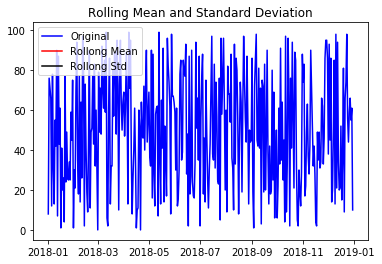

In [15]:
#determining rolling statistics
orig =plt.plot(data, color= 'blue', label='Original')
mean =plt.plot(rolmean, color= 'red', label='Rollong Mean')
std =plt.plot(rolstd, color= 'black', label='Rollong Std')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.show(block = False)

In [16]:
#perform dickey_fuller test
from statsmodels.tsa.stattools import adfuller

print ('Results of Dickey_Fuller Test:')
dftest = adfuller(data['Hours'], autolag = 'AIC')

dfoutput = pd.Series(dftest[0:4], index=['test Statics', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print (dfoutput)

Results of Dickey_Fuller Test:


KeyError: 'Hours'

In [17]:
from socket import socket

In [18]:
# Estimating trend
data_logScale = np.log(data)
plt.plt(data_logScale)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


TypeError: 'module' object is not callable

In [19]:
#khodam define movingaverage
def movingaverage(interval, window_size):
    window= numpy.ones(int(window_size))/float(window_size)
    return numpy.convolve(interval, window, 'same')

In [20]:
datasetlogScaleMinusMovingAverage = data_logScale - movingAverage
datasetlogScaleMinusMovingAverage.head(12)

NameError: name 'movingAverage' is not defined